In [1]:
# Cell Type Annotation of Zebrafish Fin Regeneration scRNA-seq Data

In [2]:
## Objective
#In this notebook, we annotate the cell clusters from the zebrafish fin regeneration scRNA-seq dataset using known marker genes from the literature.  
#This step will help link computational clusters to biologically meaningful cell types such as epidermal cells, osteoblasts, mesenchymal cells, immune cells, and blastema cells.

In [3]:
import scanpy as sc

# Load the merged and clustered dataset
adata = sc.read("merged_regeneration_data_clustered.h5ad")


C:\Users\uer\AppData\Local\Temp\ipykernel_1736\100373175.py:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.05)  # Chosen after testing 0.05, 0.1, 0.2


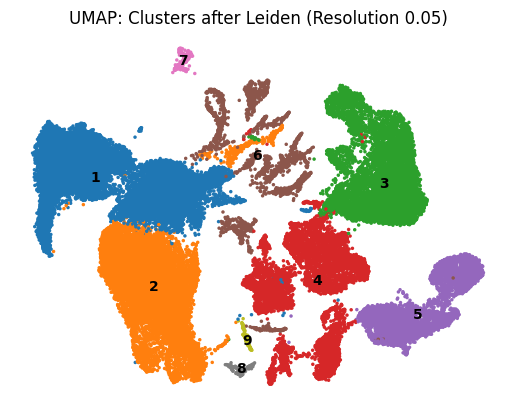

✅ Number of clusters formed: 9


In [4]:
# ================================================
# 📌 Clustering Optimization - Resolution Tuning
# ================================================

import scanpy as sc

# Try lower resolution to reduce cluster count for easier annotation
sc.tl.leiden(adata, resolution=0.05)  # Chosen after testing 0.05, 0.1, 0.2

# Renumber clusters starting from 1 for easier interpretation
adata.obs["leiden"] = (adata.obs["leiden"].astype(int) + 1).astype(str)

# Plot UMAP with new clusters
sc.pl.umap(
    adata,
    color="leiden",
    cmap="tab20",  # Distinct colors for clusters
    size=25,
    title="UMAP: Clusters after Leiden (Resolution 0.05)",
    legend_loc="on data",
    frameon=False,
)

# Print number of clusters
n_clusters = adata.obs["leiden"].nunique()
print(f"✅ Number of clusters formed: {n_clusters}")



Epidermis markers: ['tp63', 'krt4', 'krt5']


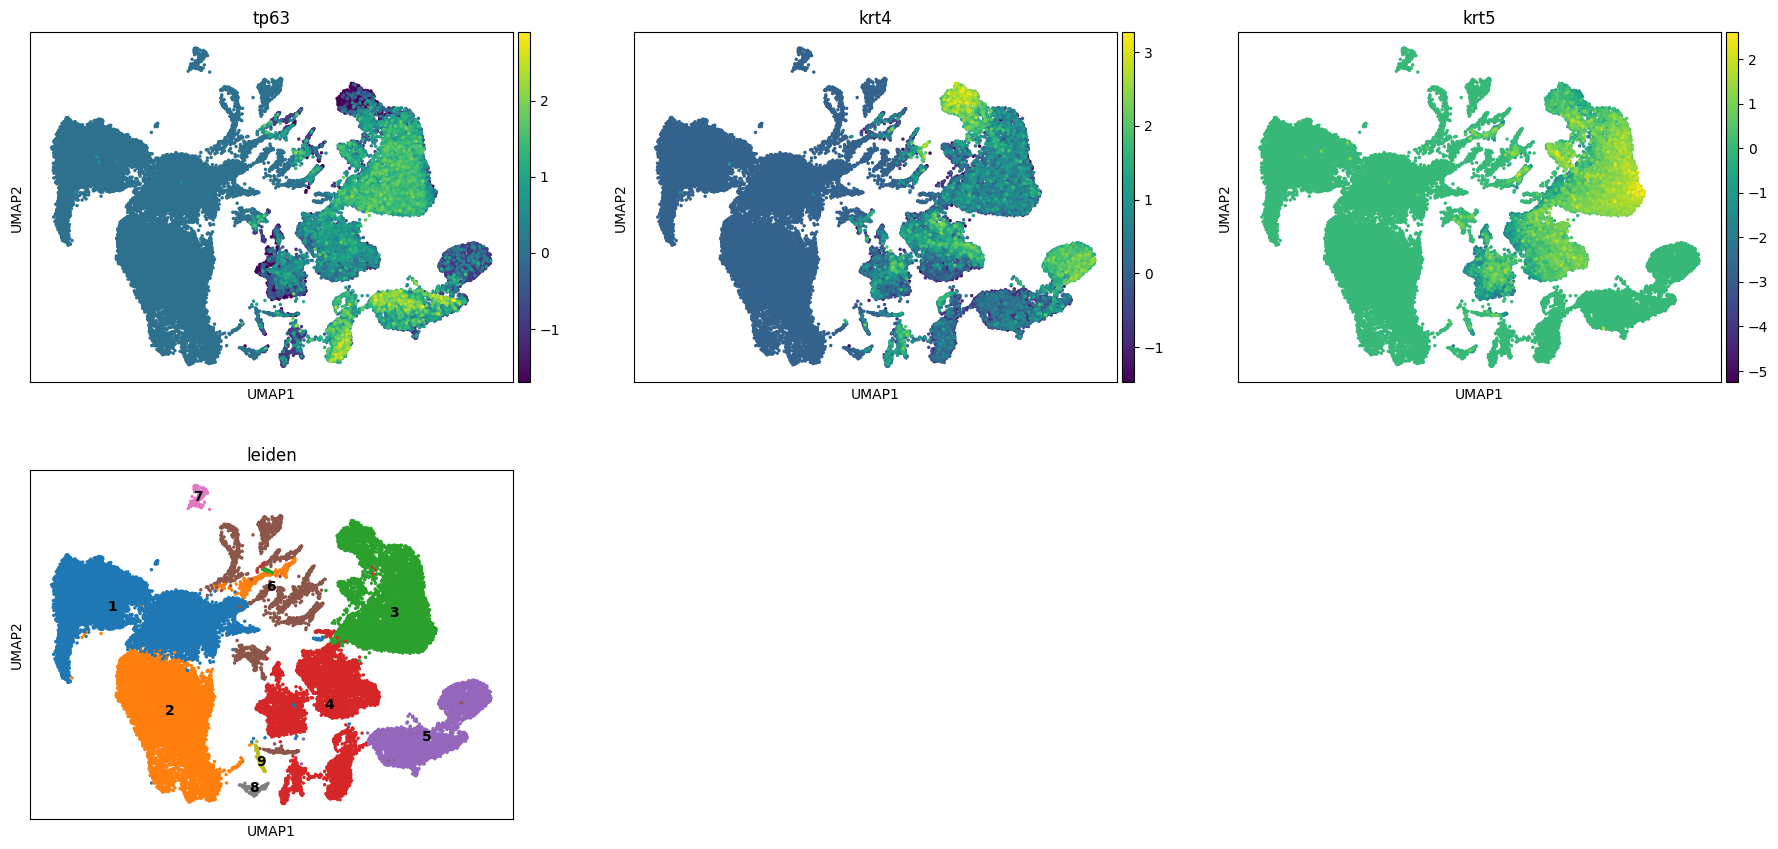


Osteoblasts markers: ['sp7', 'runx2b', 'col1a1a']


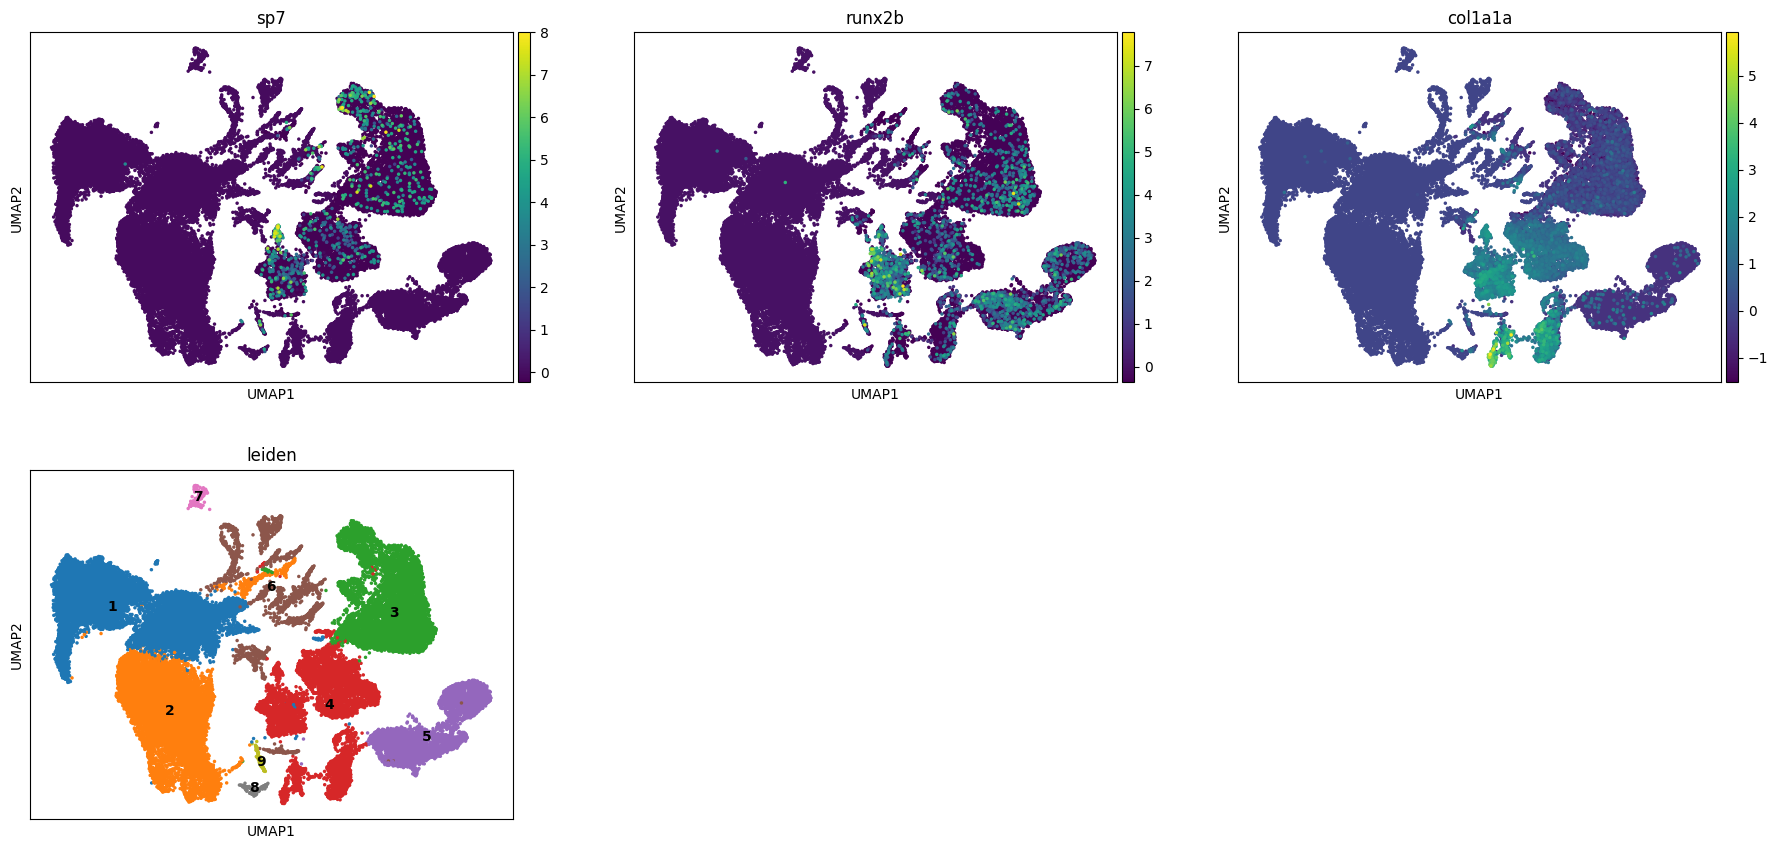


Mesenchymal markers: ['msx1b', 'pdgfra', 'twist1a']


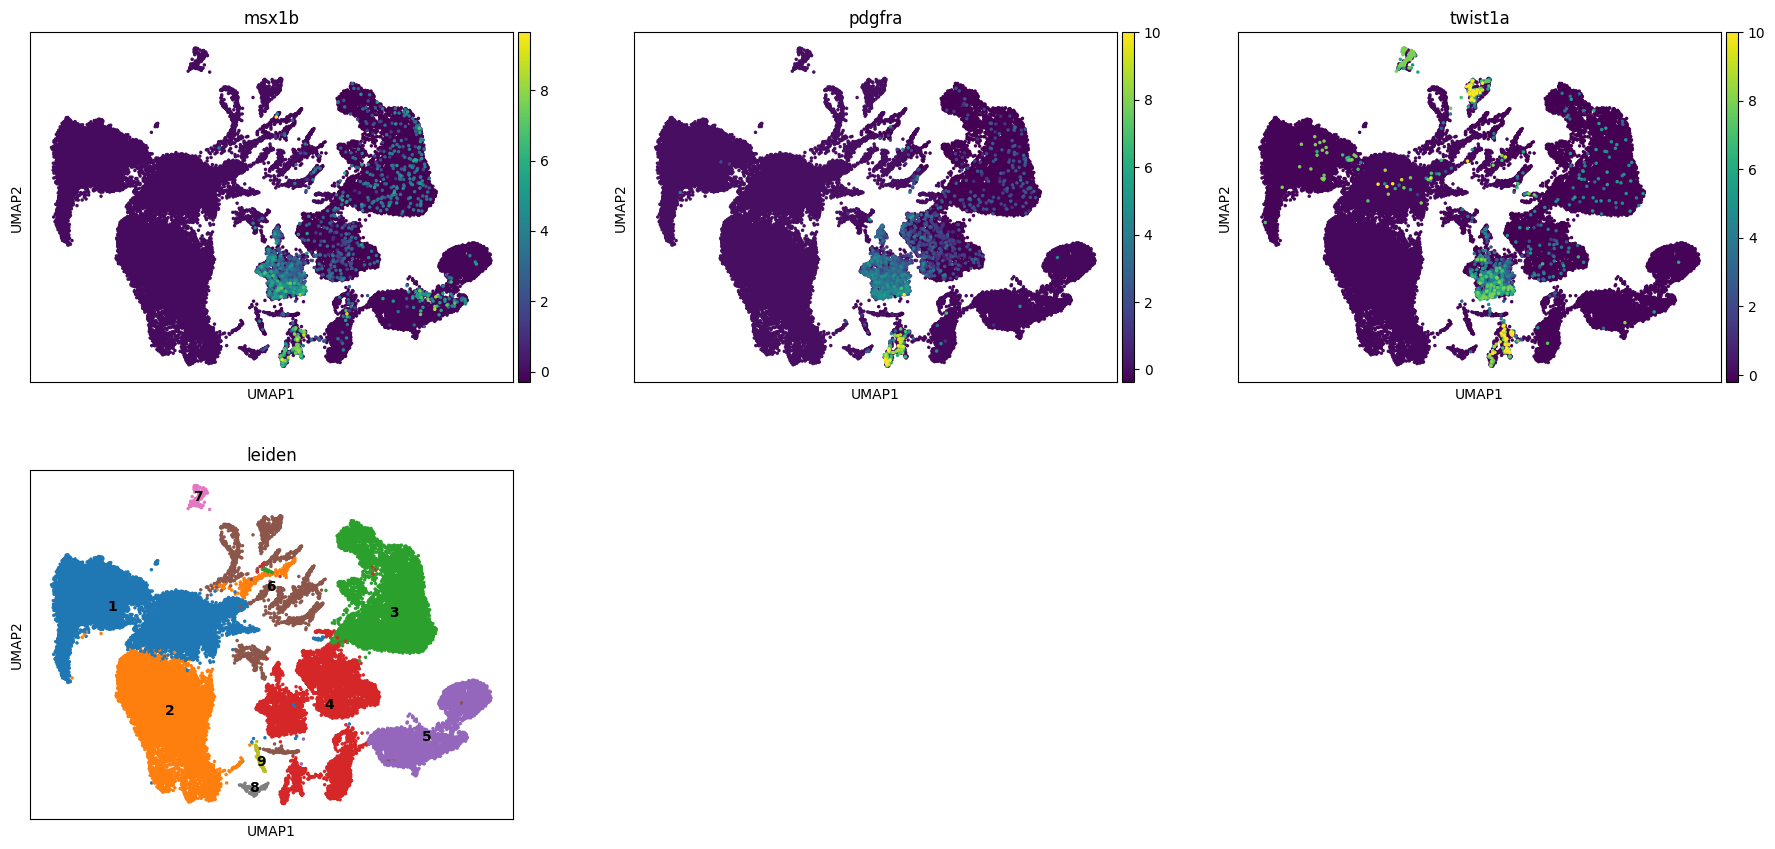


Immune markers: ['mpx', 'apoeb', 'cd79a', 'il1b']


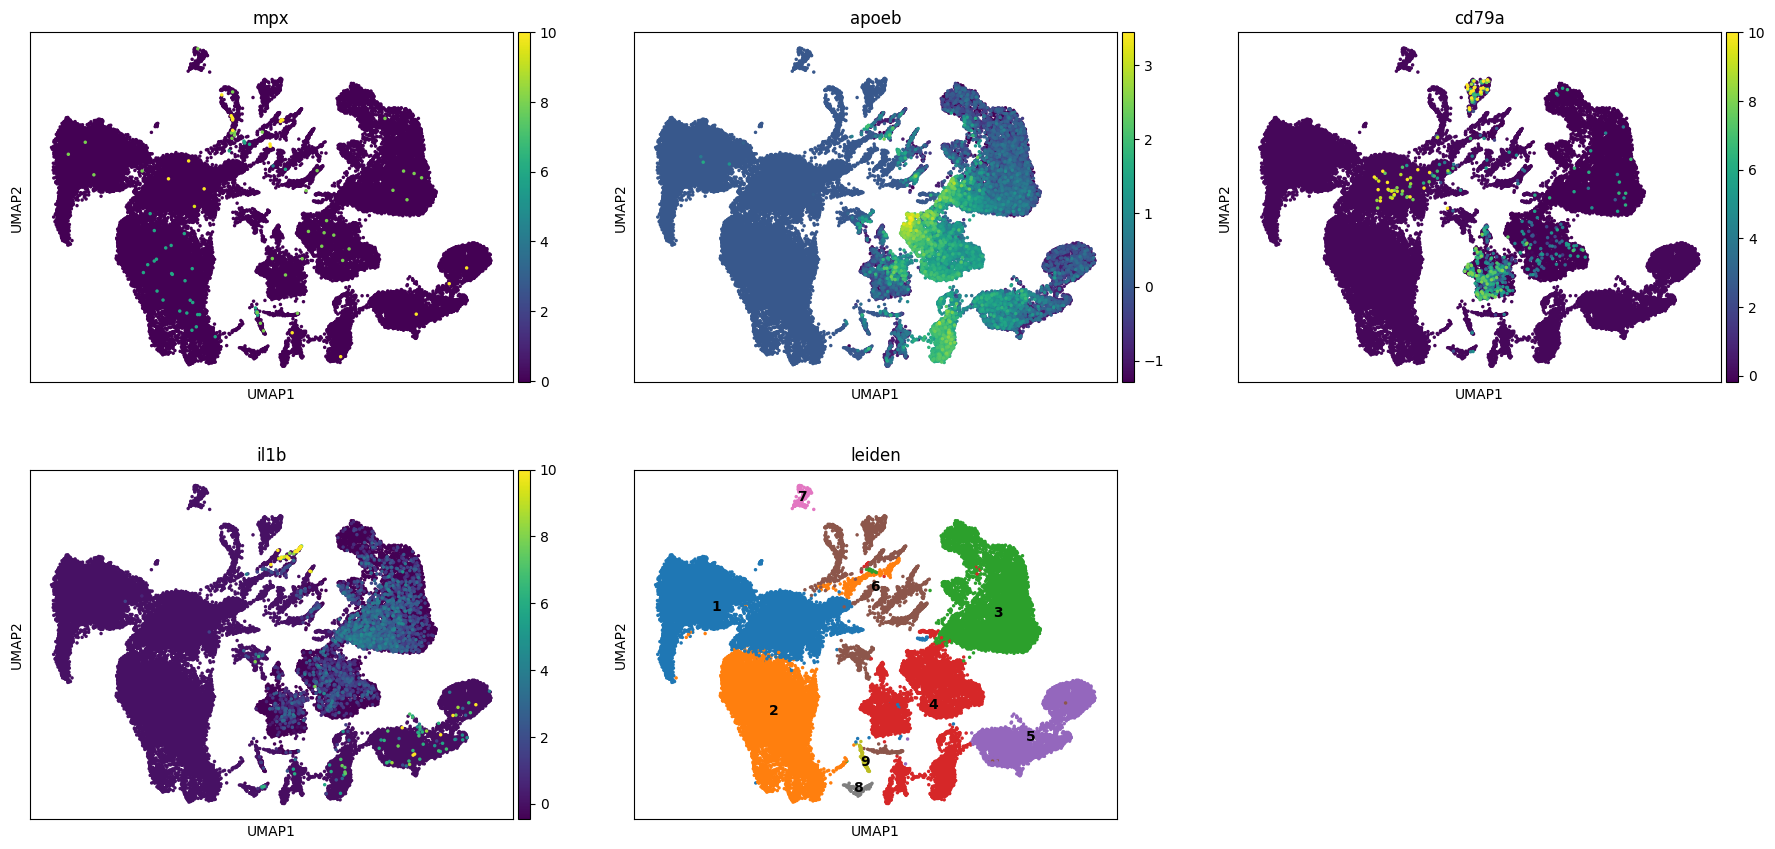


Blastema markers: ['msx1b', 'wnt5b', 'mmp9']


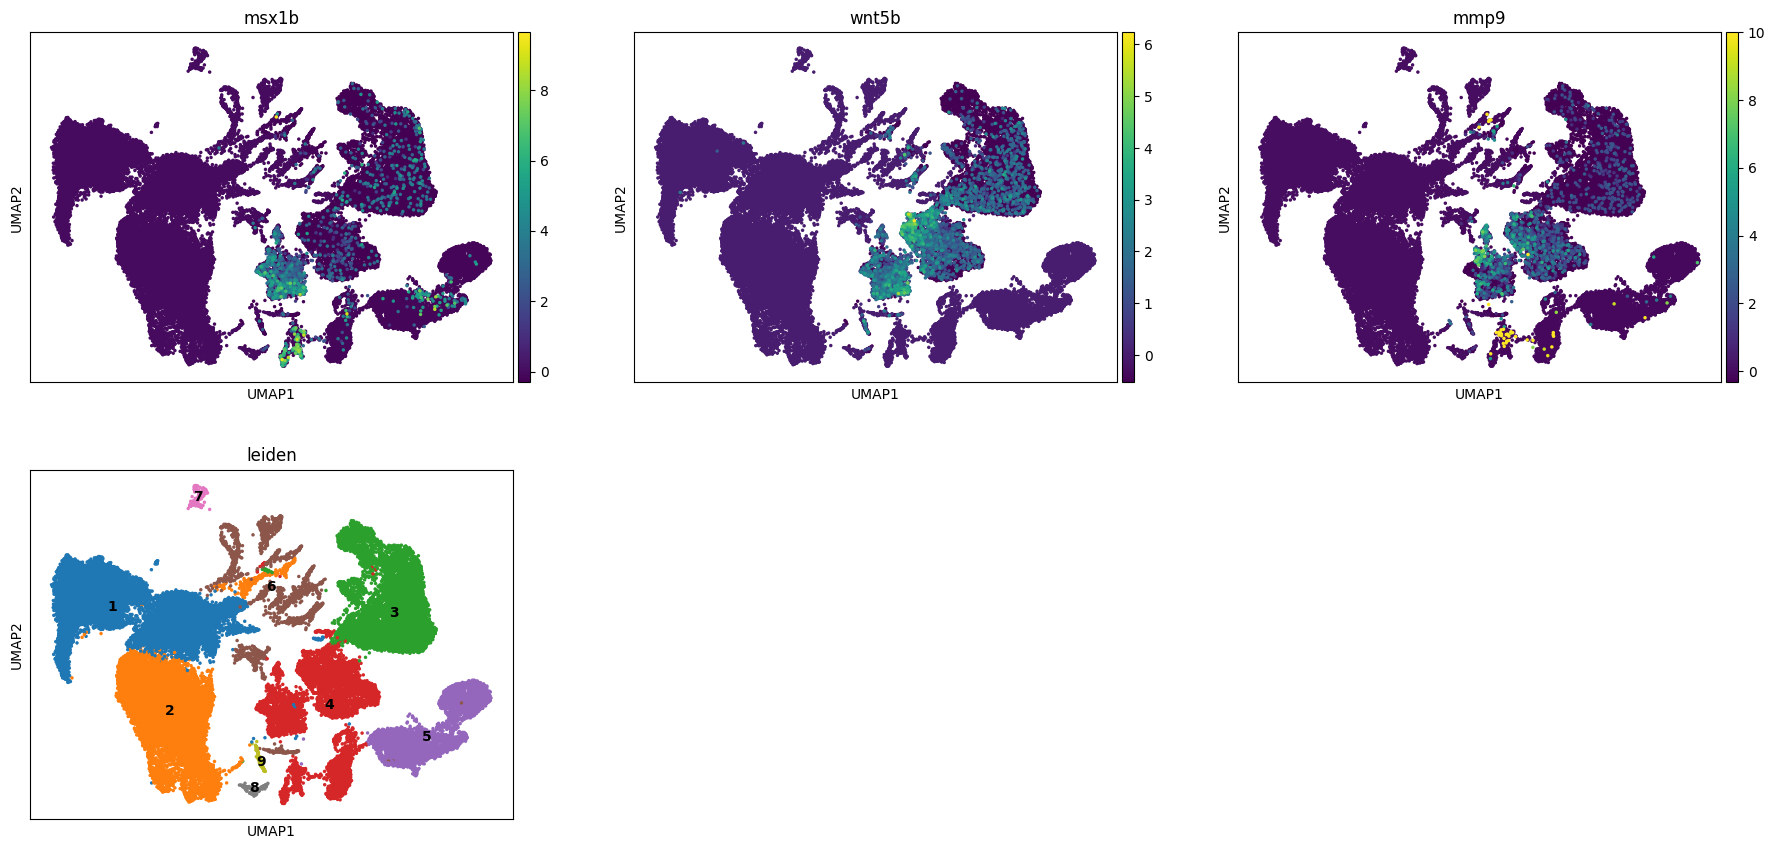


Pigment markers: ['mitfa', 'tyr', 'dct', 'ltk', 'pnp4a']


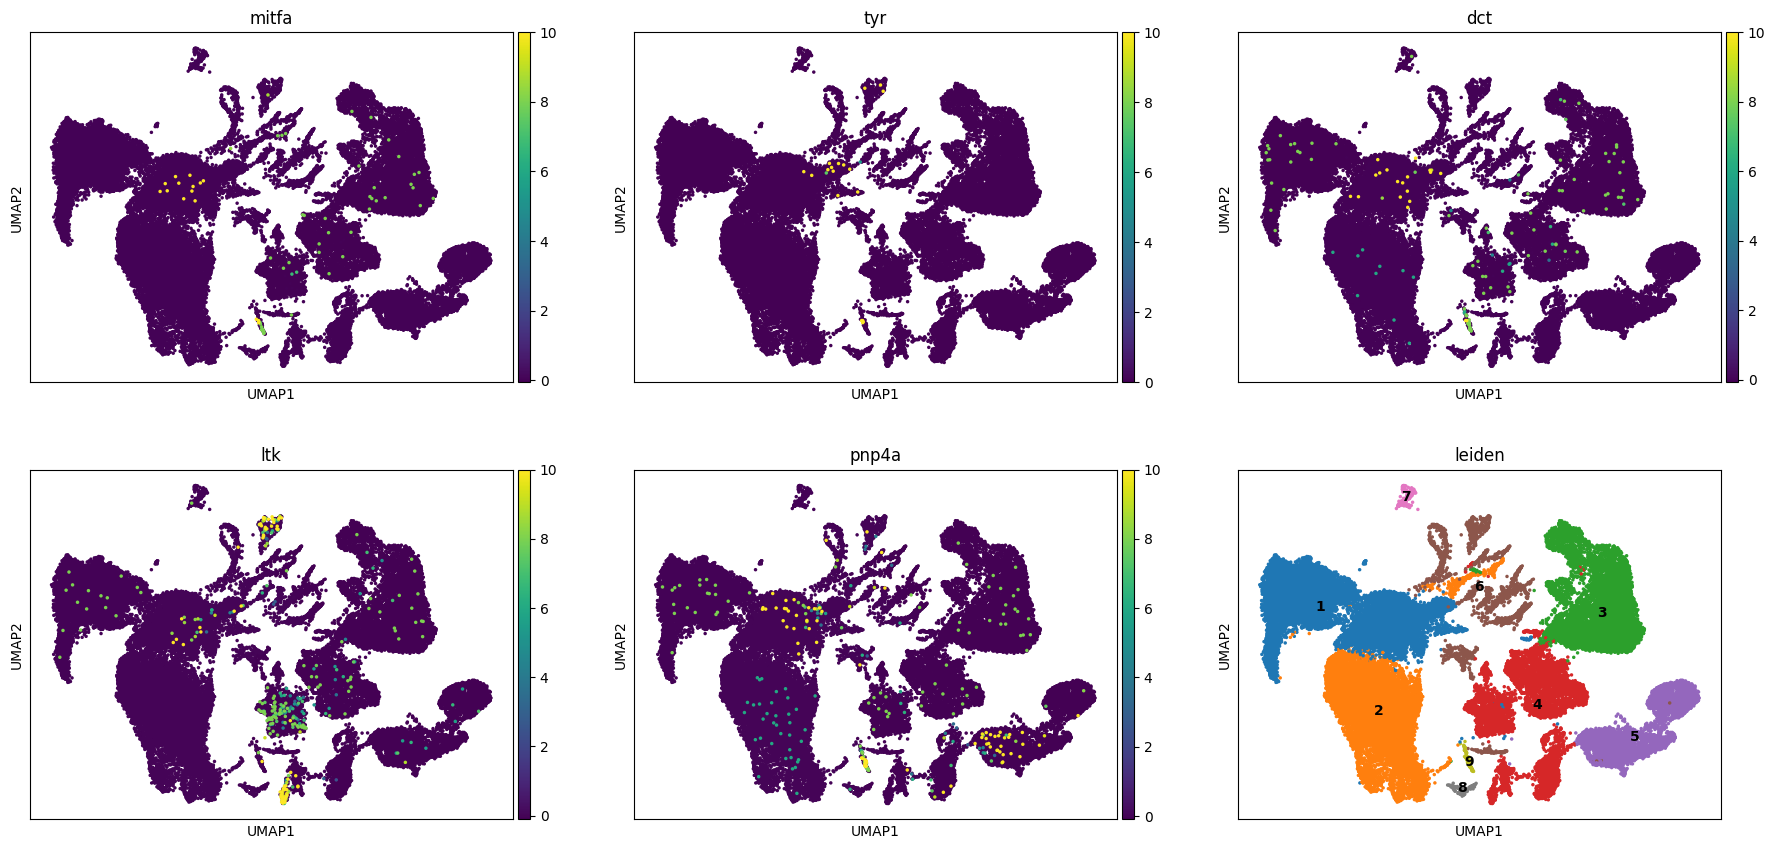


Neuronal markers: ['sox10']


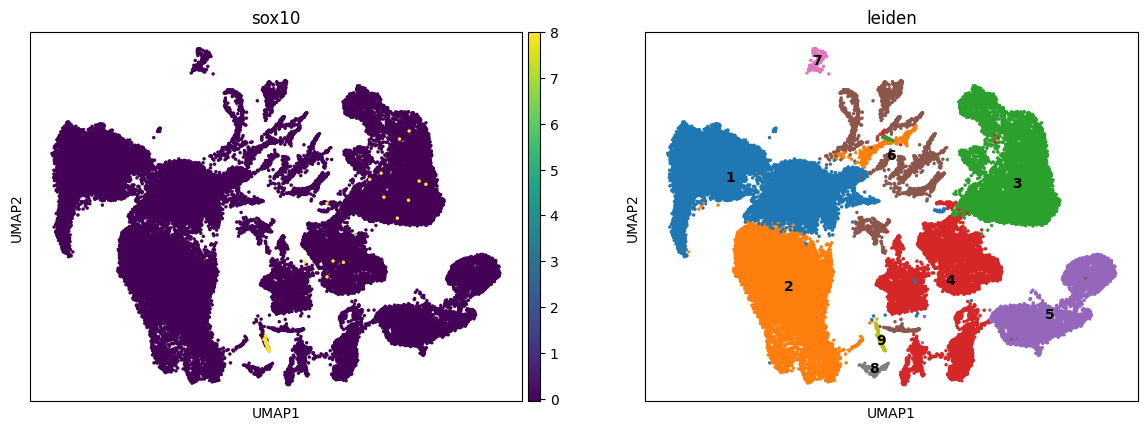

In [21]:
marker_genes_dict = {
    "Epidermis": ["tp63", "krt4", "krt5"],
    "Osteoblasts": ["sp7", "runx2b", "col1a1a"],
    "Mesenchymal": ["msx1b", "pdgfra", "twist1a"],
    "Immune": ["mpx", "apoeb", "cd79a","il1b"],
    "Blastema": ["msx1b", "wnt5b", "mmp9"],
    "Pigment": ["mitfa","tyr","dct","ltk","pnp4a"],
    "Neuronal": ["sox10"],
}

# Example: Plot marker genes per cluster (using new leiden clusters)
for cell_type, genes in marker_genes_dict.items():
    print(f"\n{cell_type} markers: {genes}")
    sc.pl.umap(
        adata,
        color=genes + ["leiden"],  # Adding clusters alongside marker genes
        cmap="viridis",
        ncols=3,
        size=25,
        legend_loc="on data",
    )

Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: 1, 2, 3, etc.
var_group_labels: Epidermis, Osteoblasts, Mesenchymal, etc.


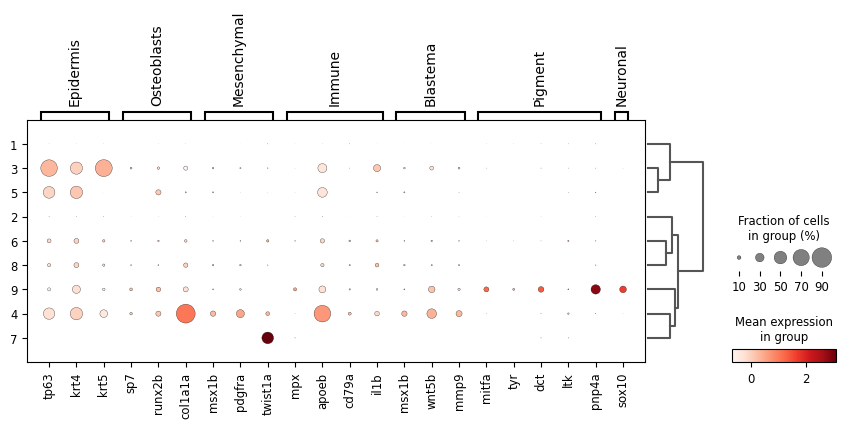

In [23]:
sc.pl.dotplot(adata, marker_genes_dict, groupby="leiden", dendrogram=True)


In [24]:
adata.obs['cell_type'] = adata.obs['leiden'].map({
    '1': 'Epidermis',
    '3': 'Epidermis',
    '4': 'Osteoblasts',
    '5': 'Immune',
    '7': 'Mesenchymal/Blastema',
    '9': 'Neuronal/Pigment',
}).fillna("Unknown")
# We fill the population of cells with no significant marker gene expression as unknown for the time being. They might repreeesent transition state.

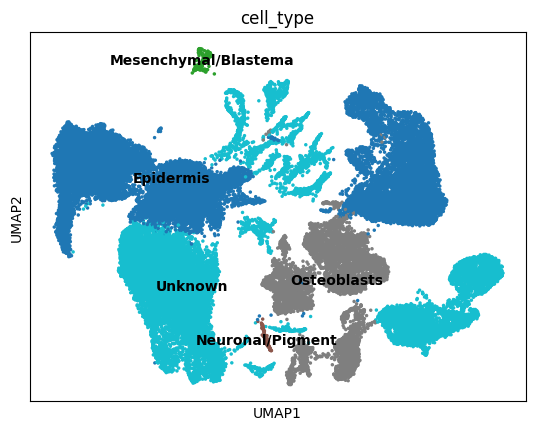

In [25]:
# Replot UMAP with cell types:
sc.pl.umap(adata, color="cell_type", palette="tab10", size=25, legend_loc="on data")


In [26]:
adata.write("merged_regeneration_annotated.h5ad")


In [ ]:
## 🔖 Cell Type Annotation Summary:
#- Clusters were annotated based on canonical marker expression:
#  - Epidermis: Clusters 1 & 3
#  - Osteoblasts: Cluster 4
#  - Mesenchymal/Blastema: Cluster 7
#  - Neuronal/Pigment: Cluster 9 (mixed)
#- Remaining clusters showed weak or unclear marker expression and were labeled as "Unknown".
#- These annotations will guide downstream analyses (pseudotime, DEGs, etc.).